# Bend Radius Study:

Nufern fiber, fundamental mode, bend radius now varies.  Our original bend radius was 4000 * R_core

In [1]:
import numpy as np
import ngsolve as ng
import os
import matplotlib.pyplot as plt
import cmasher as cmr

from IPython.display import Video
from celluloid import Camera
from fiberamp import FiberMode

np.set_printoptions(suppress=True)

importing NGSolve-6.2.2202-77-g3d04412d0


In [5]:
main = os.path.expanduser('~/local/convergence/bending/bending_radius_study')
studyname = 'scalar_modes'

path = main + '/' + studyname + '/outputs'

if not os.path.isdir(os.path.relpath(path)):
    print('Making directory: ' + path)
    os.makedirs(os.path.relpath(path))


In [ ]:
ref = 2
p = 3

a = FiberMode(fibername='Nufern_Yb', R=8, Rout=10, h=80, refine=ref,
              curveorder=max(p, 3))

In [ ]:
# Center, radius and span
center = 11468.5009866+4.85458815e-05j
radius = .2
nspan = 4
npts = 4

# Array of bend radii
N = 1
R_bends = np.linspace(4000,4000,N)
CLs = np.zeros(N)


In [ ]:

for i, R in enumerate(R_bends):
    
    Nusqrs, Modes, _, _, CL = a.bentscalarmodes(rad=radius, ctr=center, R_bend=R,
                                    alpha=3, p=p, nspan=nspan,
                                    npts=npts, niterations=12)
    
    center = Nusqrs[0]
    CLs[i] = CL[0]

In [ ]:
plt.plot(R_bends[:], CLs[:])
plt.ylim(0.000)

In [ ]:
np.save(os.path.relpath(path + 'CLs'), CLs)

In [ ]:
np.save(os.path.relpath(path + 'alphas'), alphas)

# Observations

Initially we had R=3, Rout=5.  We got a fairly strong curvature, peaking at about alpha=1 CL=1.01.  Moving out the starting of PML to R=4 and Rout=6 gave a much flatter line, hovering near .008 for most all of the alpha values tested.  This persisted for R=5,6, Rout=7,8.

As we moved it further out to R=7, Rout=9 the loss started to increase as we increased alpha. But then it went back to normal.

# Visualization

Makin a movie yo!

In [ ]:
N, M = 100, 100
rs = np.linspace(0, 3, N)
thetas = np.linspace(0, 2*np.pi, M)

Rs, Thetas = np.meshgrid(rs, thetas)
X, Y = Rs * np.cos(Thetas), Rs * np.sin(Thetas)


In [ ]:
# Center, radius and span
center = 11467.78876477
radius = .2
nspan = 4
npts = 4

# Array of bend radii
N_R = 40
R_bends = np.linspace(8000, 4000, N_R)
CLs = np.zeros(N_R)
Z = np.zeros((N_R, X.shape[0], X.shape[1]), dtype=complex)


for k, R in enumerate(R_bends):
    
    Nusqrs, Modes, _, _, CL = a.bentscalarmodes(rad=radius, ctr=center, R_bend=R,
                                    alpha=3, p=p, nspan=nspan,
                                    npts=npts, niterations=12)
    y = ng.Norm(Modes[0])
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[k,i,j]=y(a.mesh(X[i, j], Y[i, j]))
            
    center = Nusqrs[0]
    CLs[k] = CL[0]

In [ ]:
cmap = cmr.get_sub_cmap('jet', 0.2, 0.89)

fig = plt.figure(figsize=(8,8))
camera = Camera(fig)
plt.box()
for q in range(N_R):
    plt.plot(np.cos(thetas), np.sin(thetas), 'b--', linewidth=1.6)
    plt.contourf(X, Y, Z[q].real, levels=60, cmap=cmap)
    plt.axis('square')
    plt.box()
    plt.xticks([])
    plt.yticks([])
    camera.snap()


In [ ]:
animation = camera.animate(interval=38.25)



In [ ]:
animation.save('mode_animation.mp4')

In [2]:
Video('mode_animation.mp4')

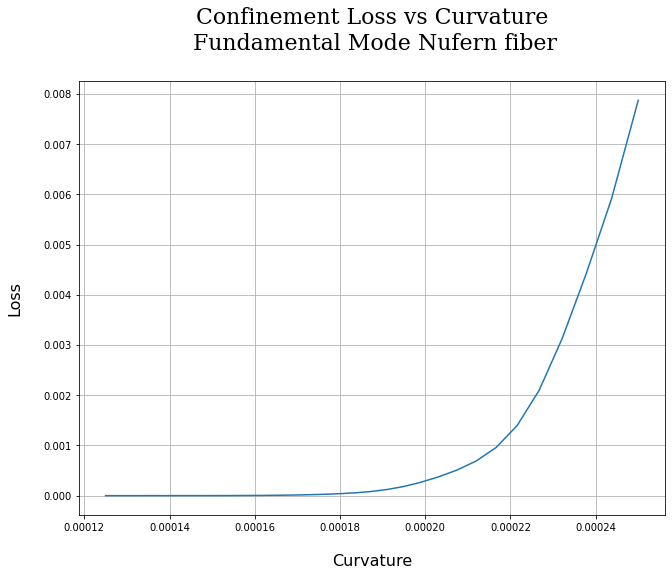

In [8]:
fig, ax = plt.subplots(figsize=(10.5,8))
ax.set_title('Confinement Loss vs Curvature\n Fundamental Mode Nufern fiber\n', name="Serif", fontsize=22)
ax.plot(1/R_bends[:], CLs[:])
# ax.set_yscale('log')
ax.set_xlabel('\nCurvature', fontsize=16)
ax.set_ylabel('Loss\n', fontsize=16)

ax.grid()


In [ ]:
np.log(CLs)

# Save if you like


In [ ]:
np.save(os.path.relpath(path + '/CLs'), CLs)

np.save(os.path.relpath(path + '/R_bends'), R_bends)

np.save(os.path.relpath(path + '/Zs'), Z)

# Load if you need

In [7]:
CLs = np.load(os.path.relpath(path + '/CLs.npy'))

R_bends = np.load(os.path.relpath(path + '/R_bends.npy'))

Z = np.load(os.path.relpath(path + '/Zs.npy'))